# Preliminary data analysis and visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../raw_data/enriched_CT_PM.csv')

In [3]:
df.head()

,Unnamed: 0,Medicine name,Therapeutic area,INN,Authorisation status,Generic,Biosimilar,Orphan medicine,First published,n_trials,...,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,pm_titles,pm_abstracts
0,0,DuoTrav,"Open-Angle Glaucoma, Ocular Hypertension",travoprost / timolol,0,0,0,0,2018-02-15 01:00:00,54,...,2,0,2,1,2,17,30,44,Comparison of the efficacy and safety of fixed...,Combining two medications in one bottle may im...
1,1,Palynziq,Phenylketonurias,pegvaliase,0,0,0,1,2019-05-29 13:43:00,12,...,0,0,0,1,4,3,0,11,Evidence- and consensus-based recommendations ...,Phenylketonuria (PKU) is a rare metabolic diso...
2,2,Ifirmacombi,Hypertension,irbesartan / hydrochlorothiazide,0,1,0,0,2017-12-20 12:01:00,20,...,0,0,2,0,0,5,12,36,Efficacy and safety of a fixed combination of ...,"In a multi-center, single-arm, prospective stu..."
3,3,Topotecan Hospira,"Uterine Cervical Neoplasms, Small Cell Lung Ca...",topotecan,0,0,0,0,2018-04-13 20:29:00,111,...,4,1,0,34,65,21,0,523,A Phase II Clinical Trial of CPI-613 in Patien...,Small cell lung cancer (SCLC) is a common lung...
4,4,CoAprovel,Hypertension,irbesartan / hydrochlorothiazide,0,0,0,0,2017-08-22 00:09:00,20,...,0,0,2,0,0,5,12,36,Efficacy and safety of a fixed combination of ...,"In a multi-center, single-arm, prospective stu..."


In [4]:
df.columns

Index(['Unnamed: 0', 'Medicine name', 'Therapeutic area', 'INN',
       'Authorisation status', 'Generic', 'Biosimilar', 'Orphan medicine',
       'First published', 'n_trials', 'status_not_yet_recruiting',
       'status_recruiting', 'status_enrolling_by_invitation',
       'status_active_not_recruiting', 'status_suspended', 'status_terminated',
       'status_completed', 'status_withdrawn', 'status_unknown', 'org_fed',
       'org_indiv', 'org_industry', 'org_network', 'org_nih', 'org_other',
       'org_other_gov', 'phase_early_1', 'phase_not_applicable', 'phase_1',
       'phase_2', 'phase_3', 'phase_4', 'pm_results', 'pm_titles',
       'pm_abstracts'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df['First published'] = pd.to_datetime(df['First published'])

## Describe and info

In [9]:
df.describe()

,Authorisation status,Generic,Biosimilar,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,...,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,...,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,0.040098,0.173486,0.049100,0.102291,179.698854,5.889525,22.765139,0.665303,11.905892,0.490998,...,7.741408,94.081833,3.823241,1.073650,16.919804,26.118658,57.861702,40.613748,28.171849,1139.179214
std,0.196270,0.378822,0.216165,0.303155,430.032512,15.531535,57.476795,2.174250,28.649513,2.048431,...,24.337517,271.138063,11.982988,4.202625,124.016650,65.691507,152.541649,75.013107,62.752298,2164.051946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,1.000000,41.000000
50%,0.000000,0.000000,0.000000,0.000000,55.000000,1.000000,5.000000,0.000000,3.000000,0.000000,...,0.000000,22.000000,0.000000,0.000000,2.000000,4.000000,11.000000,15.000000,8.000000,278.000000
75%,0.000000,0.000000,0.000000,0.000000,171.000000,6.000000,19.000000,1.000000,8.000000,0.000000,...,3.000000,77.000000,3.000000,1.000000,12.000000,17.750000,37.750000,46.000000,30.000000,1146.000000
max,1.000000,1.000000,1.000000,1.000000,8167.000000,277.000000,946.000000,45.000000,324.000000,45.000000,...,239.000000,5364.000000,211.000000,83.000000,3025.000000,817.000000,1310.000000,1077.000000,1020.000000,22446.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 34 columns):
Medicine name                     1222 non-null object
Therapeutic area                  1222 non-null object
INN                               1222 non-null object
Authorisation status              1222 non-null int64
Generic                           1222 non-null int64
Biosimilar                        1222 non-null int64
Orphan medicine                   1222 non-null int64
First published                   1222 non-null datetime64[ns]
n_trials                          1222 non-null int64
status_not_yet_recruiting         1222 non-null int64
status_recruiting                 1222 non-null int64
status_enrolling_by_invitation    1222 non-null int64
status_active_not_recruiting      1222 non-null int64
status_suspended                  1222 non-null int64
status_terminated                 1222 non-null int64
status_completed                  1222 non-null int64
status_withdrawn 

## Mean by authorisation status

In [16]:
pd.set_option('display.max_columns', None)
df.groupby(df['Authorisation status']).mean()

,Generic,Biosimilar,Orphan medicine,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,status_completed,status_withdrawn,status_unknown,org_fed,org_indiv,org_industry,org_network,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results
Authorisation status,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.179881,0.049446,0.094629,178.472293,5.861893,22.701620,0.647059,12.018755,0.467178,14.812447,100.589088,4.839727,16.082694,0.659847,0.196078,69.412617,3.988917,7.778346,92.645354,3.768968,1.040068,14.957374,26.232737,58.596760,40.926684,28.289003,1154.078431
1,0.020408,0.040816,0.285714,209.061224,6.551020,24.285714,1.102041,9.204082,1.061224,11.367347,132.204082,4.489796,18.510204,1.775510,0.326531,64.408163,2.102041,6.857143,128.469388,5.122449,1.877551,63.897959,23.387755,40.265306,33.122449,25.367347,782.510204


In [20]:
import seaborn as sns

<AxesSubplot:xlabel='Authorisation status'>

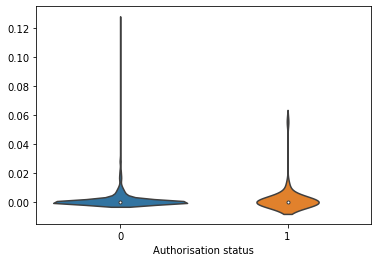

In [35]:
sns.violinplot(y=df['status_suspended']/df['n_trials'], x=df['Authorisation status'])

<AxesSubplot:xlabel='Authorisation status', ylabel='pm_results'>

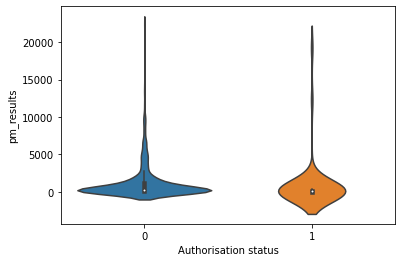

In [49]:
sns.violinplot(y=df['pm_results'], x=df['Authorisation status'])

## NAs

In [84]:
df.isna().sum()

Medicine name                      0
Therapeutic area                   0
INN                                0
Authorisation status               0
Generic                            0
Biosimilar                         0
Orphan medicine                    0
First published                    0
n_trials                           0
status_not_yet_recruiting          0
status_recruiting                  0
status_enrolling_by_invitation     0
status_active_not_recruiting       0
status_suspended                   0
status_terminated                  0
status_completed                   0
status_withdrawn                   0
status_unknown                     0
org_fed                            0
org_indiv                          0
org_industry                       0
org_network                        0
org_nih                            0
org_other                          0
org_other_gov                      0
phase_early_1                      0
phase_not_applicable               0
p

In [83]:
df[df.pm_titles.isna() | df.pm_abstracts.isna()]

,Medicine name,Therapeutic area,INN,Authorisation status,Generic,Biosimilar,Orphan medicine,First published,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,status_completed,status_withdrawn,status_unknown,org_fed,org_indiv,org_industry,org_network,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,pm_titles,pm_abstracts
44,Adrovance,Postmenopausal Osteoporosis,"alendronic acid, colecalciferol",0,0,0,0,2018-07-06 11:38:00,14,0,2,0,0,0,0,10,1,1,0,0,10,0,0,4,0,0,1,1,3,6,3,0,NaN,NaN
66,Actrapid,Diabetes Mellitus,human insulinÂ (rDNA),0,0,0,0,2018-03-14 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
80,Jivi,Hemophilia A,damoctocog alfa pegol,0,0,0,0,2019-01-28 13:01:00,5,2,1,0,1,0,0,1,0,0,0,0,5,0,0,0,0,0,0,1,0,0,1,0,NaN,NaN
81,VeraSeal,Surgical Hemostasis,human fibrinogen / human thrombin,0,0,0,0,2017-11-10 17:47:00,29,0,4,1,0,0,0,23,0,1,0,0,20,0,0,9,0,0,2,0,4,11,8,0,NaN,NaN
107,Ondexxya,Drug-Related Side Effects and Adverse Reactions,andexanet alfa,0,0,0,0,2019-06-27 16:05:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
111,Infanrix Hexa,"Hepatitis B, Tetanus, Immunization, Meningitis...","diphtheria (D), tetanus (T), pertussis (acellu...",0,0,0,0,2018-04-12 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
112,Onivyde pegylated liposomal (previously known ...,Pancreatic Neoplasms,irinotecan hydrochloride trihydrate,0,0,0,1,2017-05-22 12:10:00,5,1,1,0,2,0,0,1,0,0,0,0,2,0,2,1,0,0,0,1,3,1,0,0,NaN,NaN
132,Fosavance,Postmenopausal Osteoporosis,"alendronic acid, colecalciferol",0,0,0,0,2018-07-09 23:09:00,14,0,2,0,0,0,0,10,1,1,0,0,10,0,0,4,0,0,1,1,3,6,3,0,NaN,NaN
153,Vaxelis,"Meningitis, Haemophilus, Poliomyelitis, Tetanu...","diphtheria, tetanus, pertussis (acellular, com...",0,0,0,0,2018-04-06 17:21:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
169,Vitrakvi,Abdominal Neoplasms,larotrectinib,0,0,0,0,2019-10-24 14:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [52]:
df[df.pm_titles.isna() | df.pm_abstracts.isna()].groupby('Authorisation status').count()

,Medicine name,Therapeutic area,INN,Generic,Biosimilar,Orphan medicine,First published,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,status_completed,status_withdrawn,status_unknown,org_fed,org_indiv,org_industry,org_network,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,pm_titles,pm_abstracts
Authorisation status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,1,0
1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0


In [39]:
from pharmatools import pubmed, clinical_trials

In [55]:
# loading credentials for PubMed
from os.path import join
from dotenv import load_dotenv

env_path = join('..','.env')
load_dotenv(dotenv_path=env_path)

True

In [57]:
pubmed.get_pubmed_data('Abdominal Neoplasms', 'larotrectinib', pd.to_datetime('2019-10-24 14:30:00'))

('Supplied id parameter is empty.\n', 0)

In [60]:
df.head()

,Medicine name,Therapeutic area,INN,Authorisation status,Generic,Biosimilar,Orphan medicine,First published,n_trials,status_not_yet_recruiting,status_recruiting,status_enrolling_by_invitation,status_active_not_recruiting,status_suspended,status_terminated,status_completed,status_withdrawn,status_unknown,org_fed,org_indiv,org_industry,org_network,org_nih,org_other,org_other_gov,phase_early_1,phase_not_applicable,phase_1,phase_2,phase_3,phase_4,pm_results,pm_titles,pm_abstracts
0,DuoTrav,"Open-Angle Glaucoma, Ocular Hypertension",travoprost / timolol,0,0,0,0,2018-02-15 01:00:00,54,0,2,0,1,0,3,43,3,2,0,0,40,0,0,12,2,0,2,1,2,17,30,44,Comparison of the efficacy and safety of fixed...,Combining two medications in one bottle may im...
1,Palynziq,Phenylketonurias,pegvaliase,0,0,0,1,2019-05-29 13:43:00,12,0,2,0,1,0,0,9,0,0,0,0,10,0,0,2,0,0,0,1,4,3,0,11,Evidence- and consensus-based recommendations ...,Phenylketonuria (PKU) is a rare metabolic diso...
2,Ifirmacombi,Hypertension,irbesartan / hydrochlorothiazide,0,1,0,0,2017-12-20 12:01:00,20,0,0,0,0,0,0,18,2,0,0,0,17,0,0,3,0,0,2,0,0,5,12,36,Efficacy and safety of a fixed combination of ...,"In a multi-center, single-arm, prospective stu..."
3,Topotecan Hospira,"Uterine Cervical Neoplasms, Small Cell Lung Ca...",topotecan,0,0,0,0,2018-04-13 20:29:00,111,3,8,0,7,0,12,64,3,13,1,0,33,7,13,53,4,1,0,34,65,21,0,523,A Phase II Clinical Trial of CPI-613 in Patien...,Small cell lung cancer (SCLC) is a common lung...
4,CoAprovel,Hypertension,irbesartan / hydrochlorothiazide,0,0,0,0,2017-08-22 00:09:00,20,0,0,0,0,0,0,18,2,0,0,0,17,0,0,3,0,0,2,0,0,5,12,36,Efficacy and safety of a fixed combination of ...,"In a multi-center, single-arm, prospective stu..."


## Boxplots

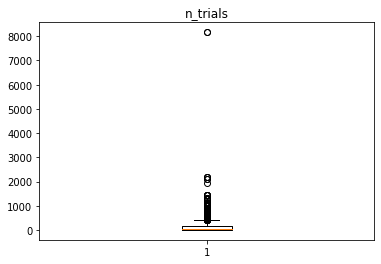

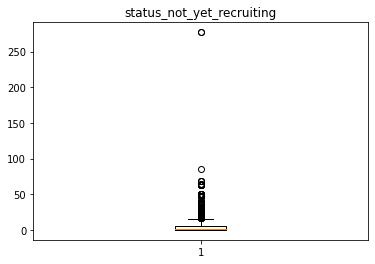

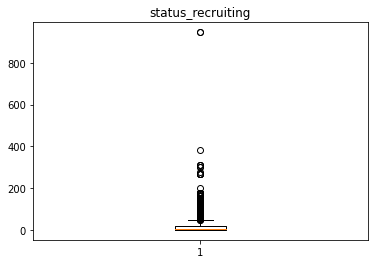

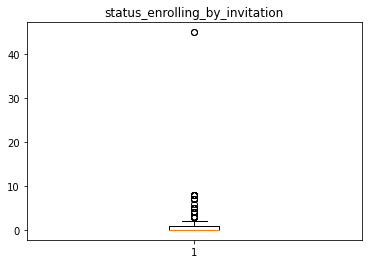

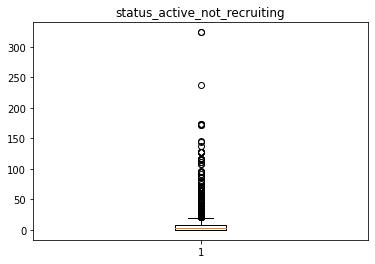

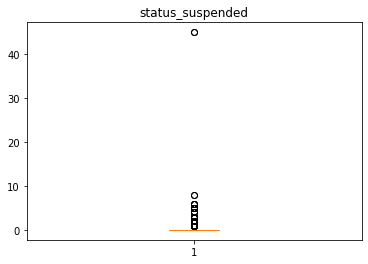

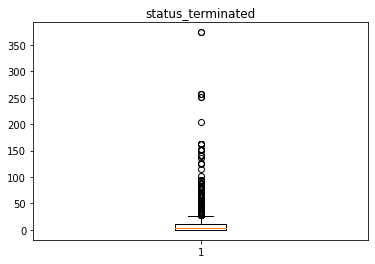

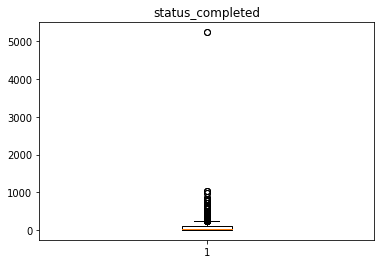

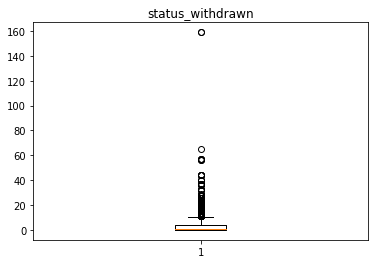

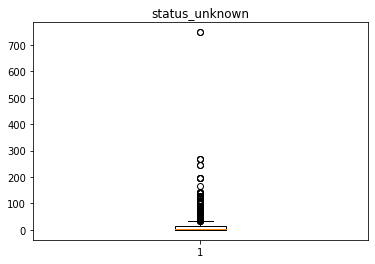

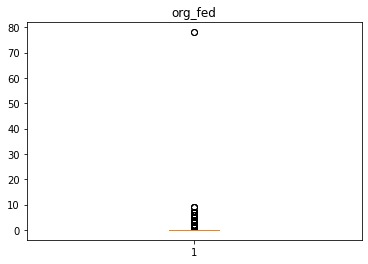

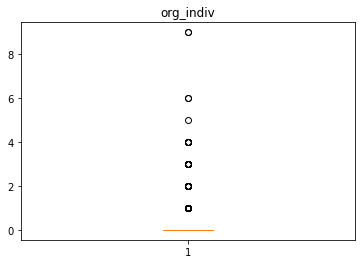

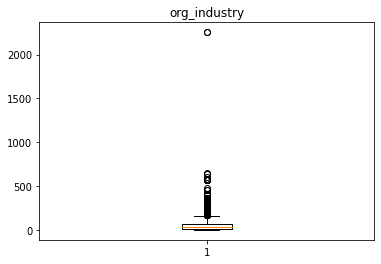

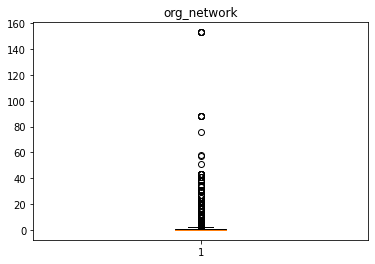

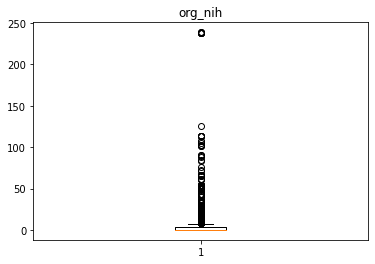

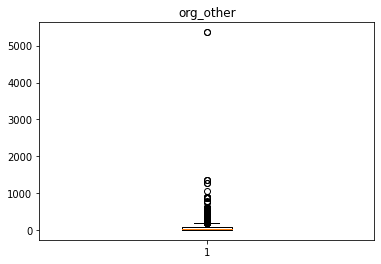

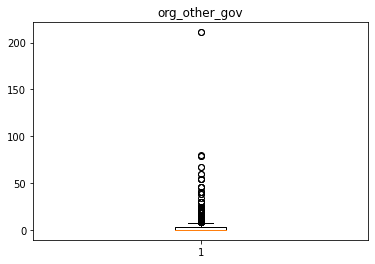

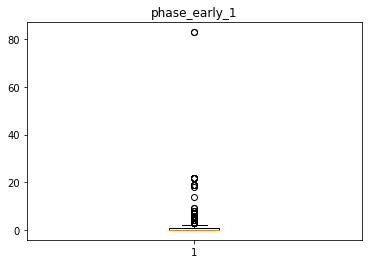

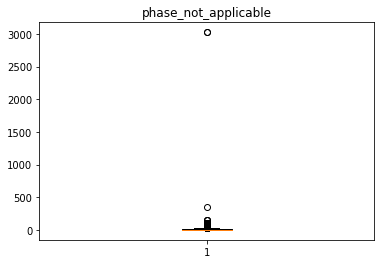

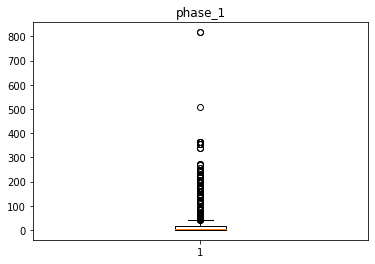

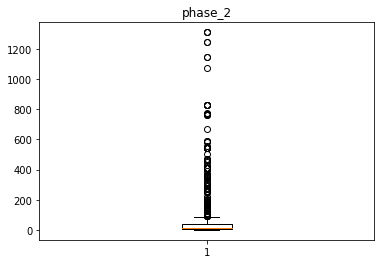

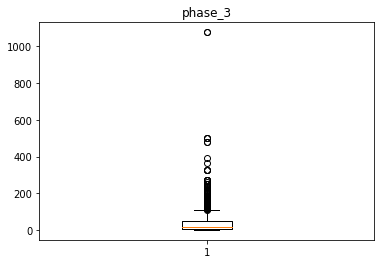

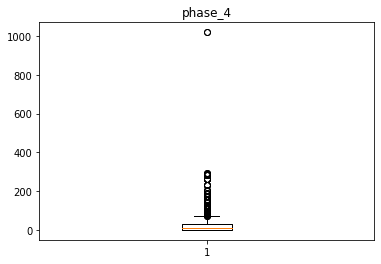

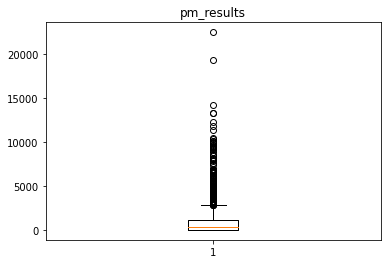

In [65]:
numeric_cols = ['n_trials', 'status_not_yet_recruiting', 'status_recruiting', 'status_enrolling_by_invitation', \
                'status_active_not_recruiting', 'status_suspended', 'status_terminated', 'status_completed', \
                'status_withdrawn', 'status_unknown', 'org_fed', 'org_indiv', 'org_industry', 'org_network', \
                'org_nih', 'org_other', 'org_other_gov', 'phase_early_1', 'phase_not_applicable', 'phase_1', \
                'phase_2', 'phase_3', 'phase_4', 'pm_results']
for col in numeric_cols:
    plt.title(col)
    plt.boxplot(df[col])
    plt.show();

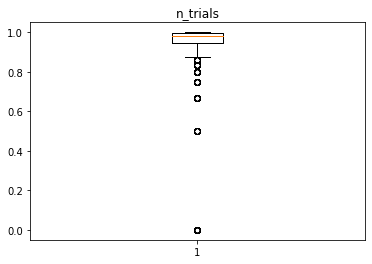

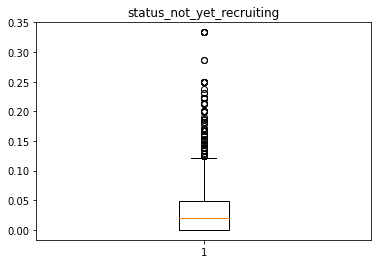

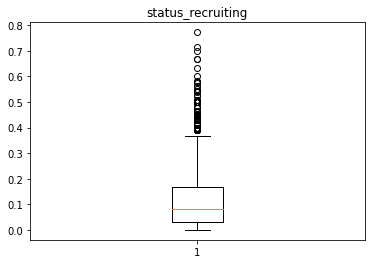

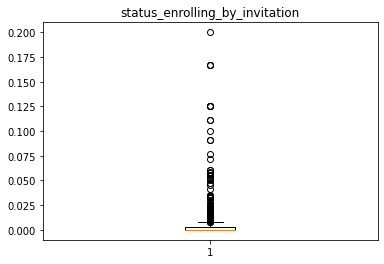

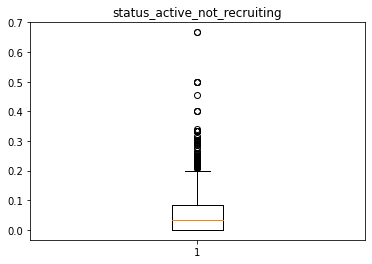

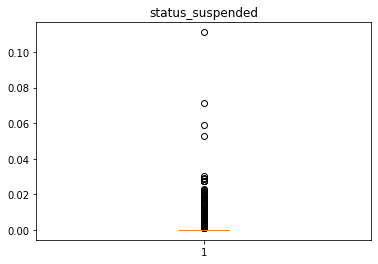

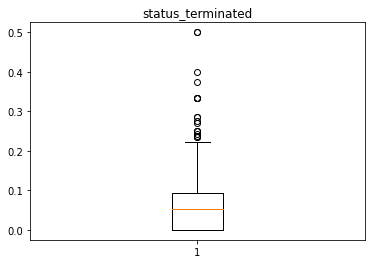

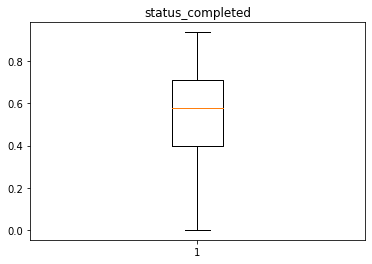

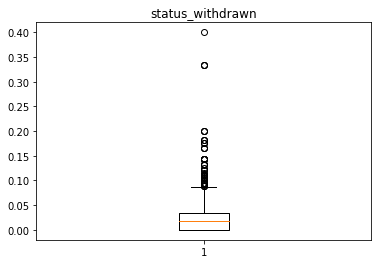

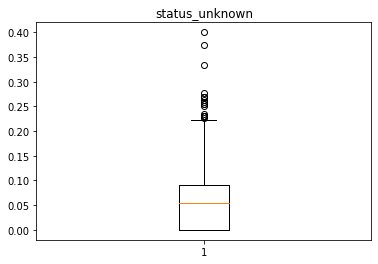

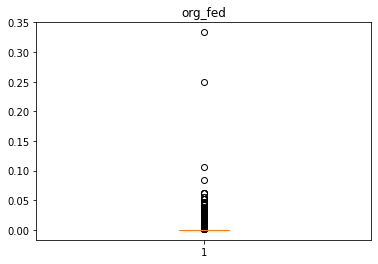

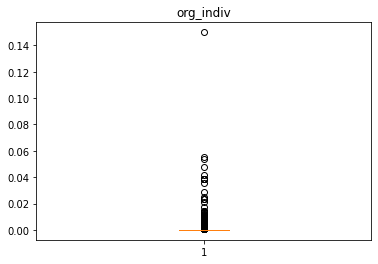

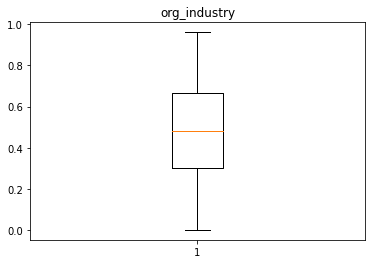

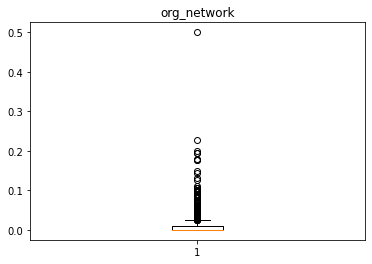

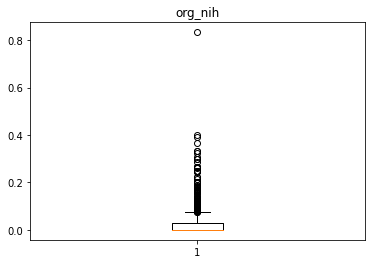

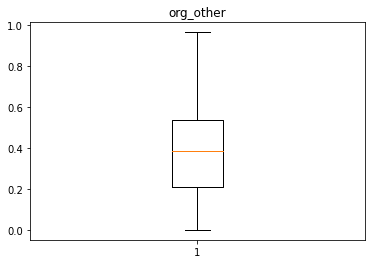

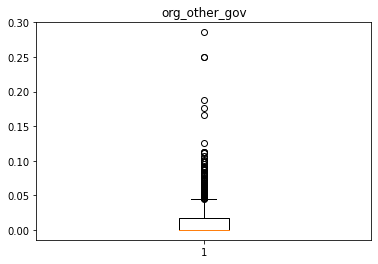

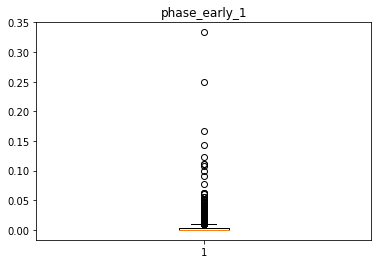

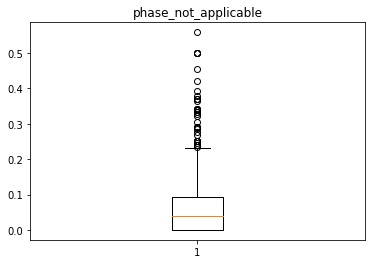

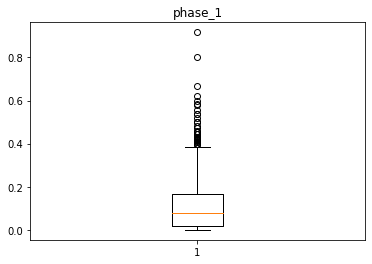

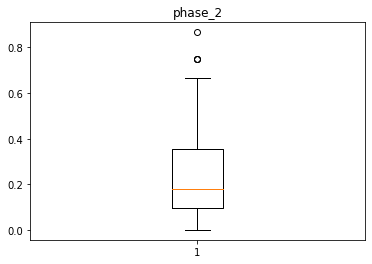

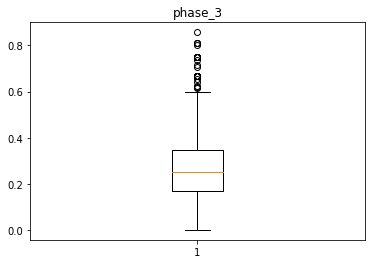

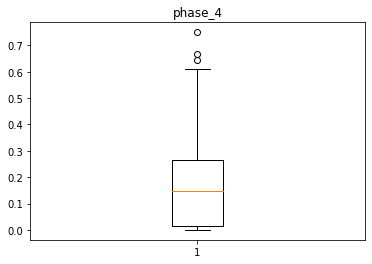

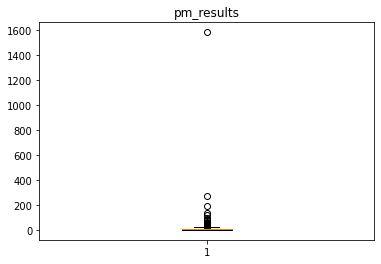

In [67]:
for col in numeric_cols:
    plt.title(col)
    plt.boxplot(df[col]/(df['n_trials'] + 1))
    plt.show();

## Date by authorisation status

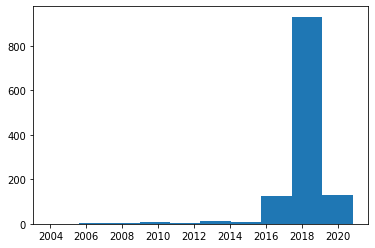

In [77]:
plt.hist(df['First published']);

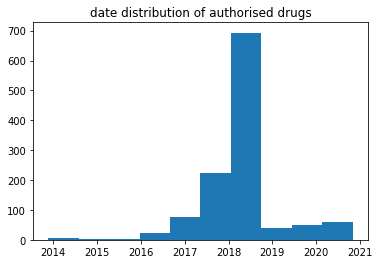

In [81]:
plt.title('date distribution of authorised drugs')
plt.hist(df[df['Authorisation status']==0]['First published']);

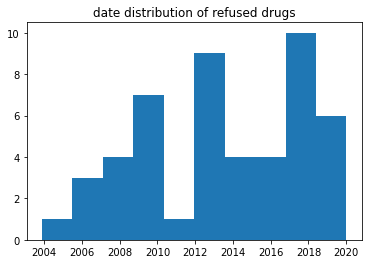

In [82]:
plt.title('date distribution of refused drugs')
plt.hist(df[df['Authorisation status']==1]['First published']);